In [ ]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Cell 2
%cd /content/drive/MyDrive/'hw1.zip (Unzipped Files)'/hw1/student_version/data # or your custom path
!sh get_data.sh
%cd ..

In [ ]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory
!python -m unittest tests.test_network

In [1]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [3]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v
  
  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])
  
  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)
  
  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))
  
  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [4]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.028 	Batch Loss 2.3027	Train Accuracy 0.0781	
Epoch: [0][10/750]	Batch Time 0.000 	Batch Loss 1.7842	Train Accuracy 0.5625	
Epoch: [0][20/750]	Batch Time 0.000 	Batch Loss 1.5226	Train Accuracy 0.6094	
Epoch: [0][30/750]	Batch Time 0.000 	Batch Loss 1.5044	Train Accuracy 0.5781	
Epoch: [0][40/750]	Batch Time 0.000 	Batch Loss 1.3713	Train Accuracy 0.6250	
Epoch: [0][50/750]	Batch Time 0.000 	Batch Loss 1.0922	Train Accuracy 0.7031	
Epoch: [0][60/750]	Batch Time 0.000 	Batch Loss 1.3430	Train Accuracy 0.5781	
Epoch: [0][70/750]	Batch Time 0.000 	Batch Loss 1.3163	Train Accuracy 0.5781	
Epoch: [0][80/750]	Batch Time 0.000 	Batch Loss 1.5104	Train Accuracy 0.5312	
Epoch: [0][90/750]	Batch Time 0.000 	Batch Loss 1.2392	Train Accuracy 0.5938	
Epoch: [0][100/750]	Batch Time 0.000 	Batch Loss 1.2438	Train Accuracy 0.5781	
Epoch: [0][110/7

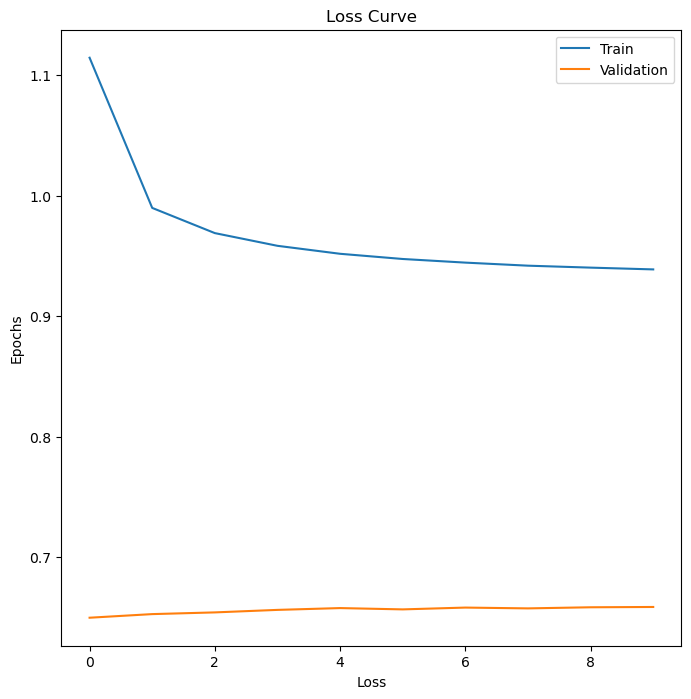

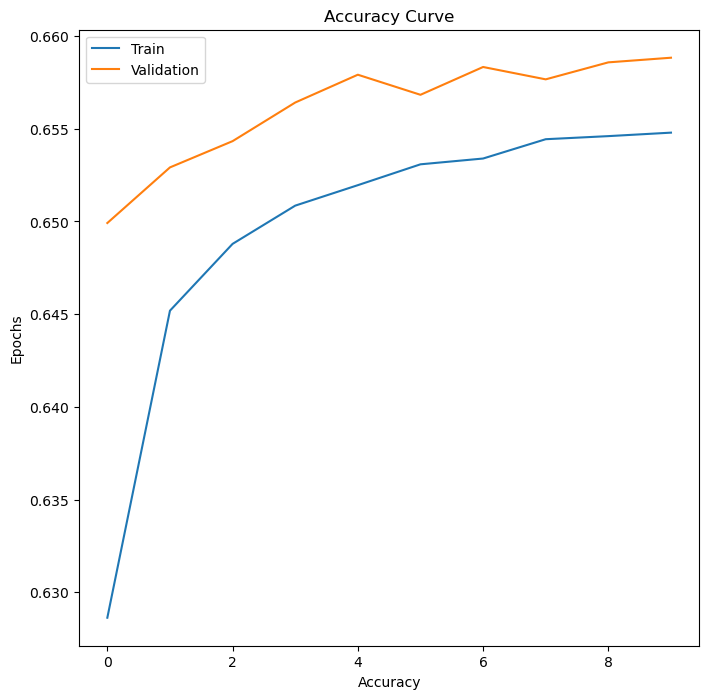

In [5]:
# Cell 7
# plot results for softmax model
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [6]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.004 	Batch Loss 2.3023	Train Accuracy 0.0938	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.2769	Train Accuracy 0.2031	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.3143	Train Accuracy 0.0469	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.3256	Train Accuracy 0.1094	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.3416	Train Accuracy 0.1094	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3278	Train Accuracy 0.0469	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.2846	Train Accuracy 0.0938	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.3323	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.2790	Train Accuracy 0.2188	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.3301	Train Accuracy 0.0938	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.3061	Train Accuracy 0.0938	
Epoch: [0][110/7

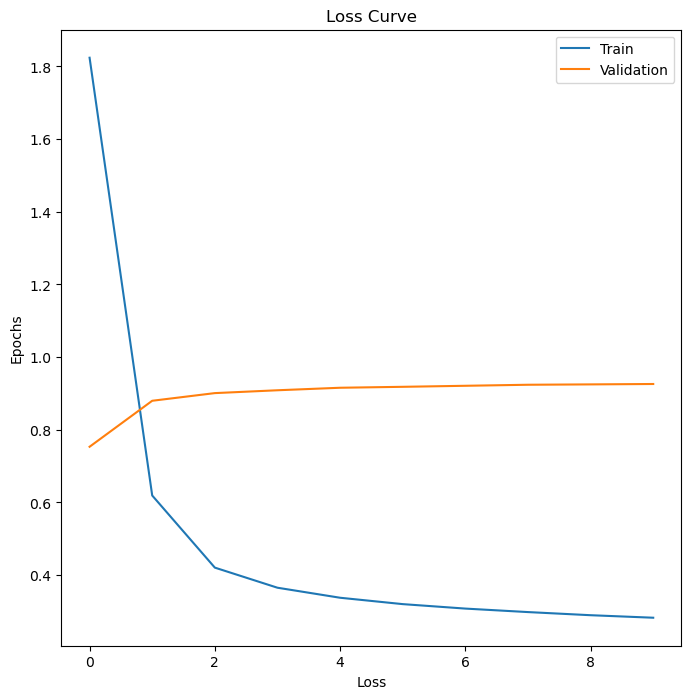

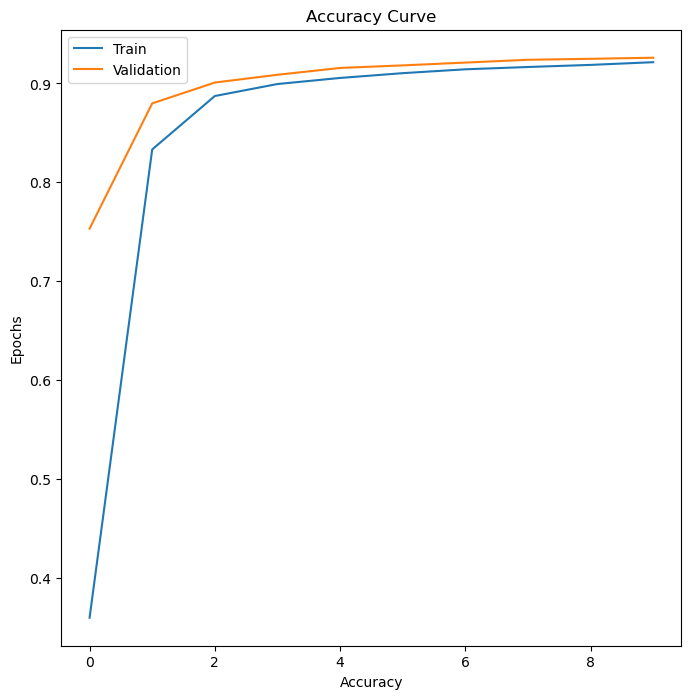

In [7]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Arthur Scaquetti do Nascimento
- GT Email: anascimento7@gatech.edu
- GT ID: 903721549



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [11]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3021	Train Accuracy 0.1719	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.2579	Train Accuracy 0.1719	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.2388	Train Accuracy 0.0781	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.2517	Train Accuracy 0.1406	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.2476	Train Accuracy 0.1250	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.1457	Train Accuracy 0.1562	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.1670	Train Accuracy 0.2344	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.1657	Train Accuracy 0.2031	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 1.9287	Train Accuracy 0.2969	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 1.9616	Train Accuracy 0.2812	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 1.5765	Train Accuracy 0.3750	
Epoch: [0][110/7

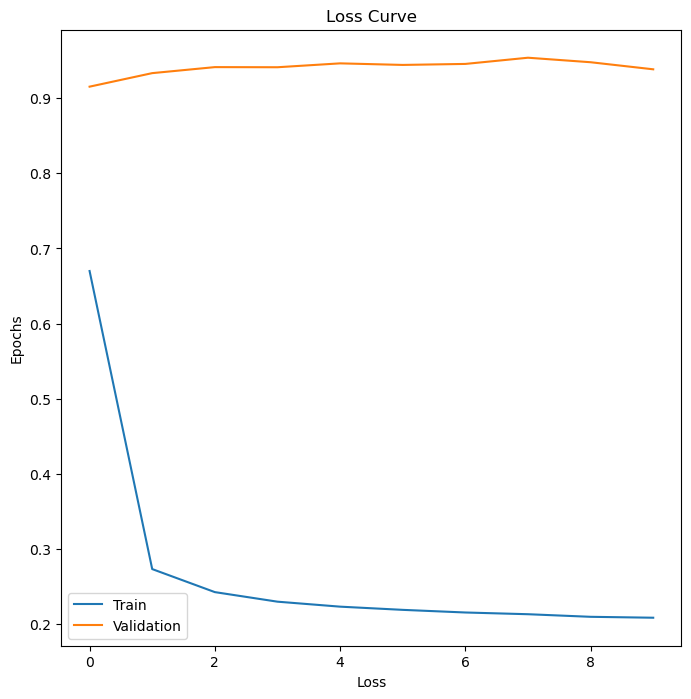

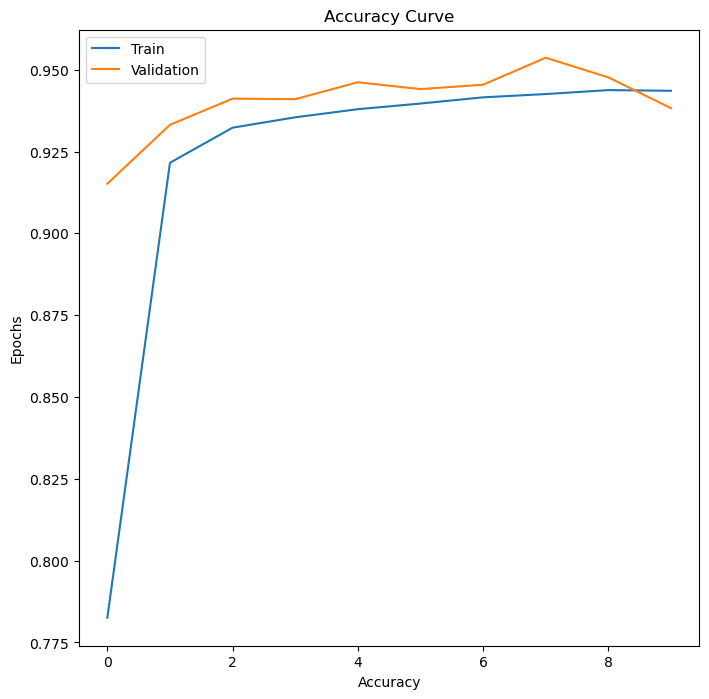

In [12]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [15]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3025	Train Accuracy 0.0781	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.3240	Train Accuracy 0.0938	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.2561	Train Accuracy 0.1719	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.3645	Train Accuracy 0.0469	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.2982	Train Accuracy 0.1406	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3297	Train Accuracy 0.0312	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.3219	Train Accuracy 0.0312	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.3213	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.2698	Train Accuracy 0.2031	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.3111	Train Accuracy 0.1406	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.2857	Train Accuracy 0.1250	
Epoch: [0][110/7

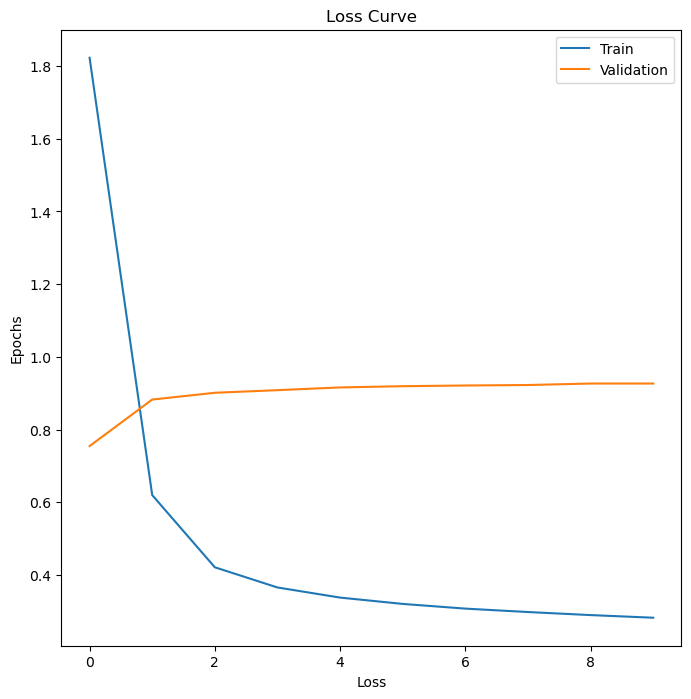

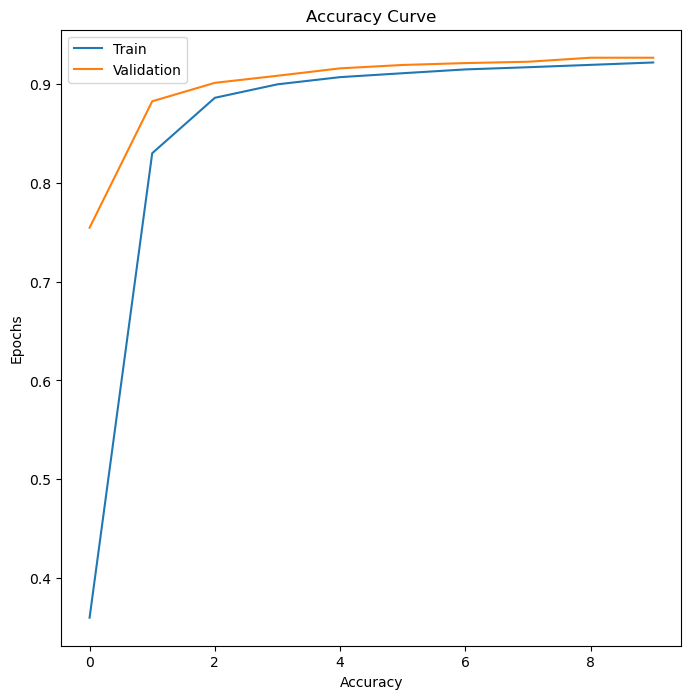

In [16]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [17]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3019	Train Accuracy 0.1094	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.3092	Train Accuracy 0.1250	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.2991	Train Accuracy 0.1250	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.3099	Train Accuracy 0.0469	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.3030	Train Accuracy 0.1250	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3000	Train Accuracy 0.1250	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.3011	Train Accuracy 0.1719	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.2979	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.3151	Train Accuracy 0.0312	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.3103	Train Accuracy 0.0625	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.3023	Train Accuracy 0.1875	
Epoch: [0][110/7

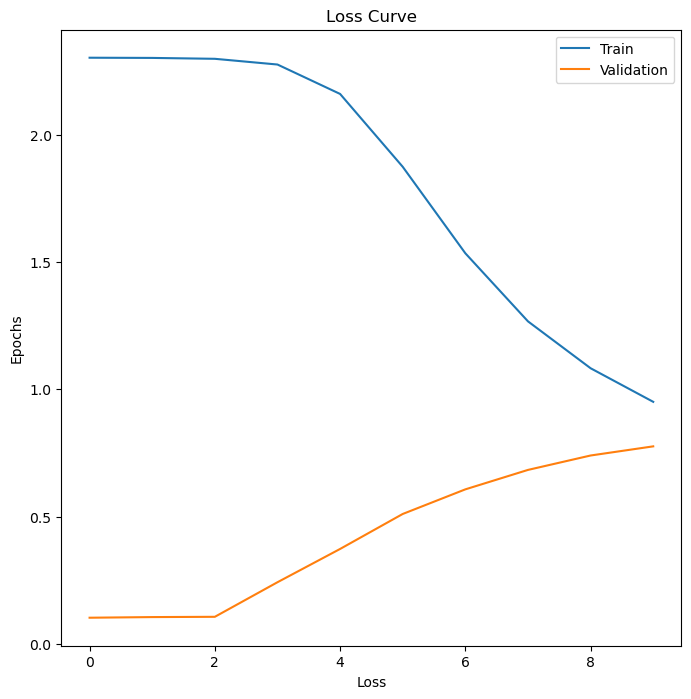

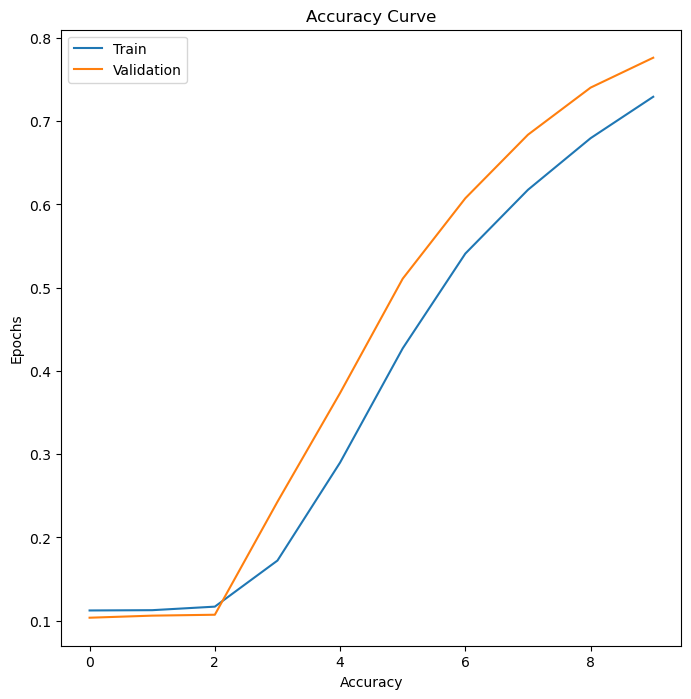

In [18]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [19]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3031	Train Accuracy 0.0469	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.3047	Train Accuracy 0.0781	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.3172	Train Accuracy 0.1250	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.2931	Train Accuracy 0.1250	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.3081	Train Accuracy 0.0781	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3043	Train Accuracy 0.0625	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.3011	Train Accuracy 0.1406	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.3265	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.2860	Train Accuracy 0.1719	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.2930	Train Accuracy 0.1094	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.2887	Train Accuracy 0.2188	
Epoch: [0][110/7

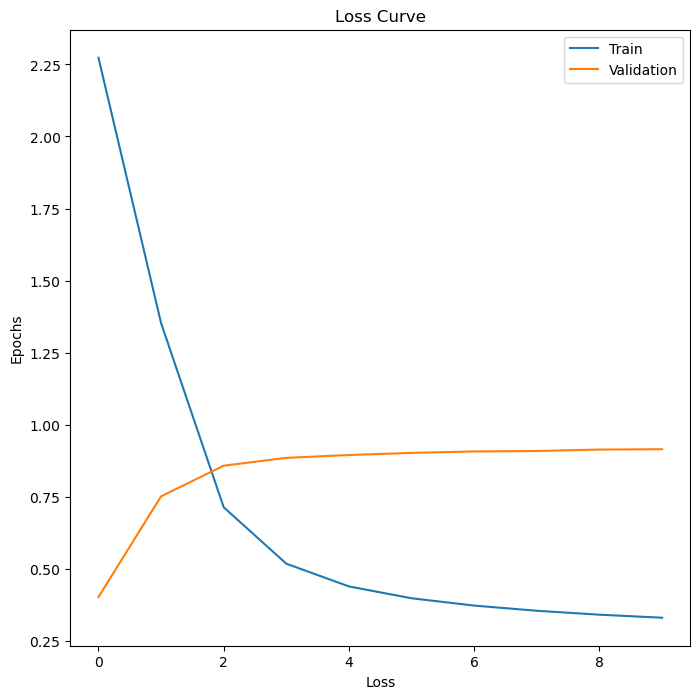

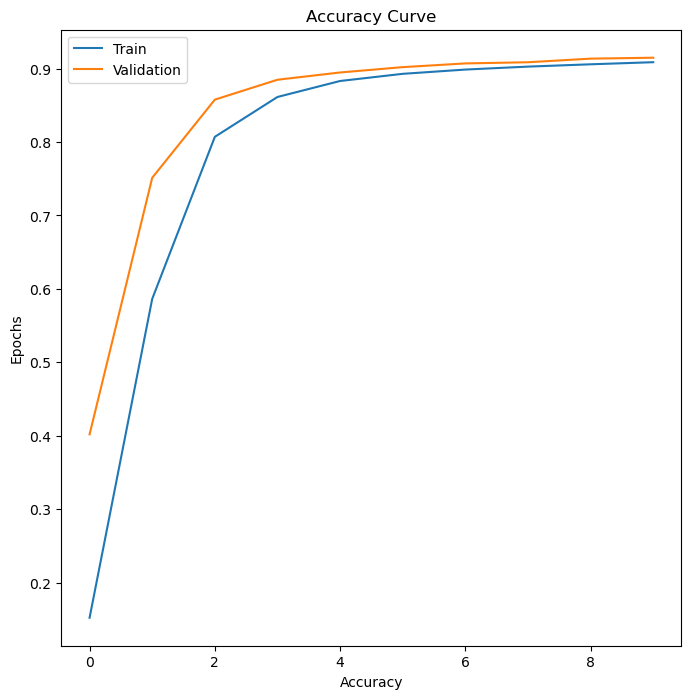

In [20]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1


Arthur's NOTE: keeping lr = 0.1 (original)

Original reg = 0.001

In [21]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3031	Train Accuracy 0.1094	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.3490	Train Accuracy 0.1094	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.3184	Train Accuracy 0.1250	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.3041	Train Accuracy 0.1094	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.3428	Train Accuracy 0.1250	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3336	Train Accuracy 0.1250	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.3208	Train Accuracy 0.0469	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.3211	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.3108	Train Accuracy 0.1094	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.3090	Train Accuracy 0.1562	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.3279	Train Accuracy 0.0781	
Epoch: [0][110/7

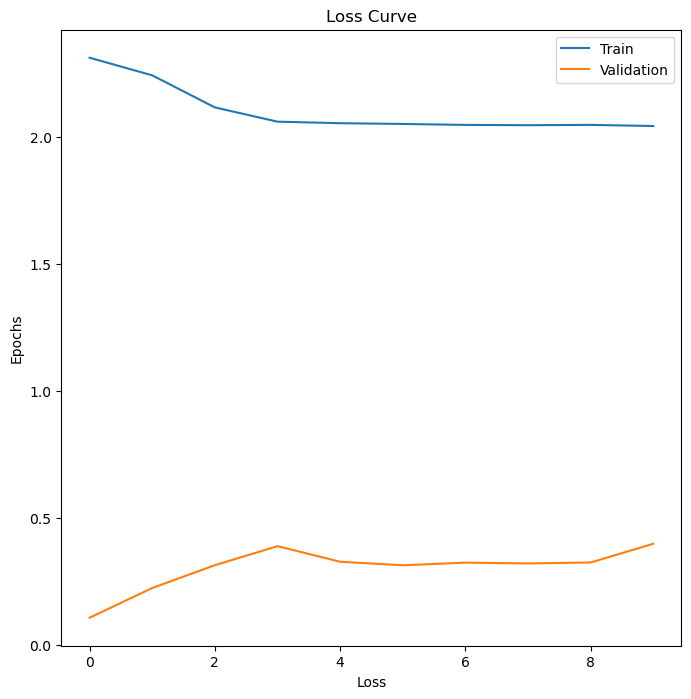

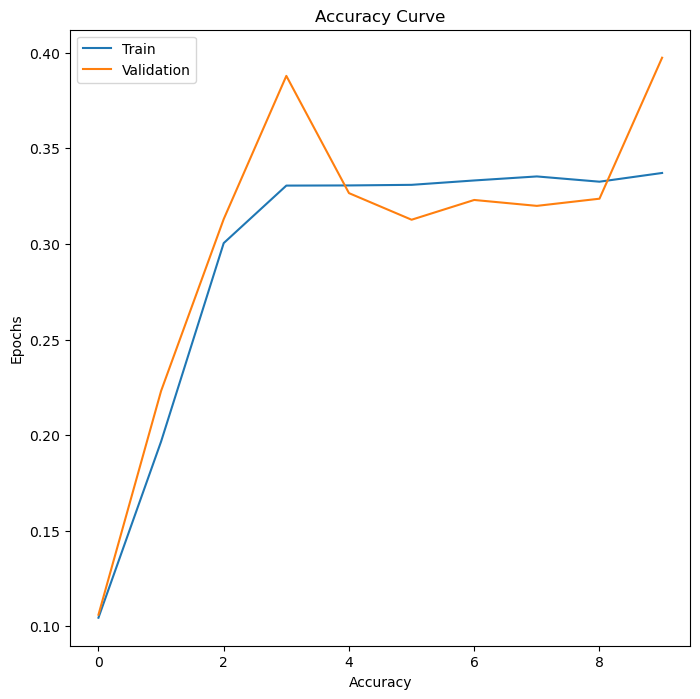

In [22]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [23]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3020	Train Accuracy 0.1406	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.2976	Train Accuracy 0.1250	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.2980	Train Accuracy 0.1406	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.3059	Train Accuracy 0.0781	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.3157	Train Accuracy 0.1562	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3186	Train Accuracy 0.0938	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.3275	Train Accuracy 0.0625	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.2845	Train Accuracy 0.1250	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.2993	Train Accuracy 0.1250	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.2835	Train Accuracy 0.2656	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.3613	Train Accuracy 0.0469	
Epoch: [0][110/7

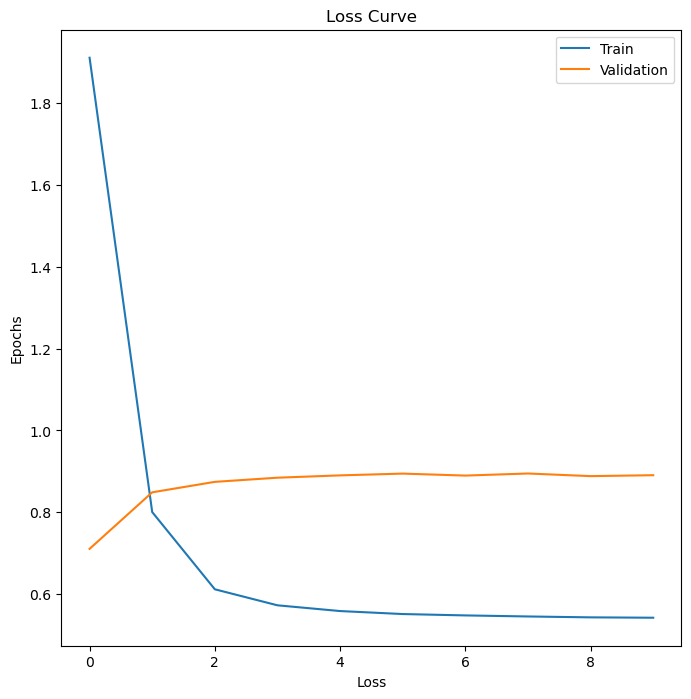

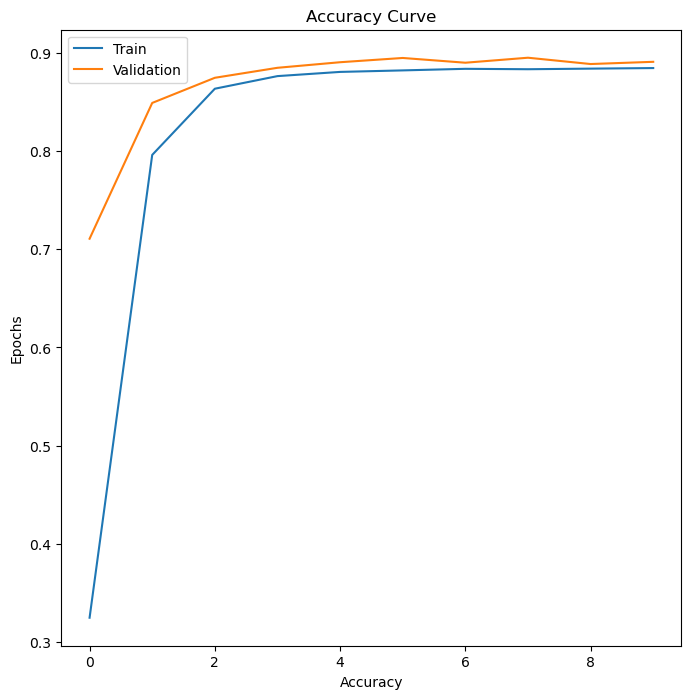

In [24]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [25]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3028	Train Accuracy 0.0938	
Epoch: [0][10/750]	Batch Time 0.001 	Batch Loss 2.3193	Train Accuracy 0.1094	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 2.3048	Train Accuracy 0.1094	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 2.2962	Train Accuracy 0.1250	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 2.2995	Train Accuracy 0.1250	
Epoch: [0][50/750]	Batch Time 0.001 	Batch Loss 2.3426	Train Accuracy 0.0781	
Epoch: [0][60/750]	Batch Time 0.001 	Batch Loss 2.3273	Train Accuracy 0.0625	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 2.2914	Train Accuracy 0.1406	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 2.3820	Train Accuracy 0.0469	
Epoch: [0][90/750]	Batch Time 0.001 	Batch Loss 2.3064	Train Accuracy 0.0938	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.3128	Train Accuracy 0.0469	
Epoch: [0][110/7

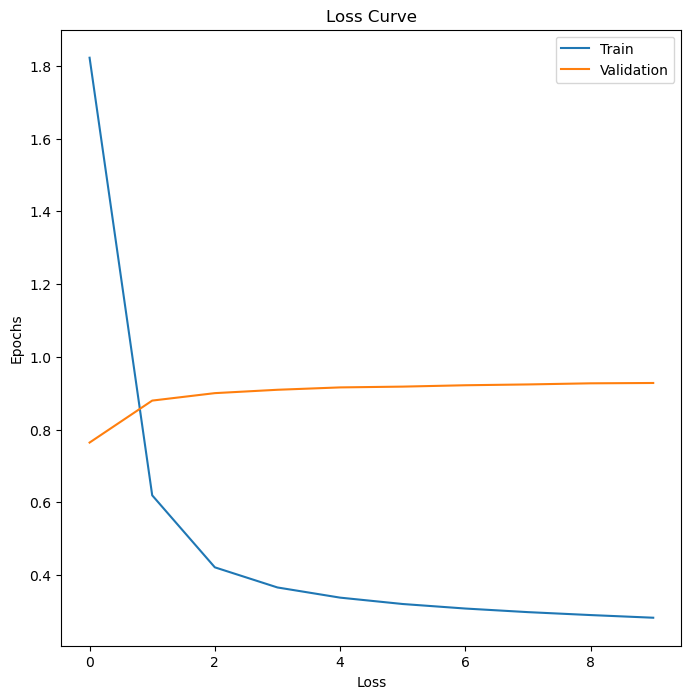

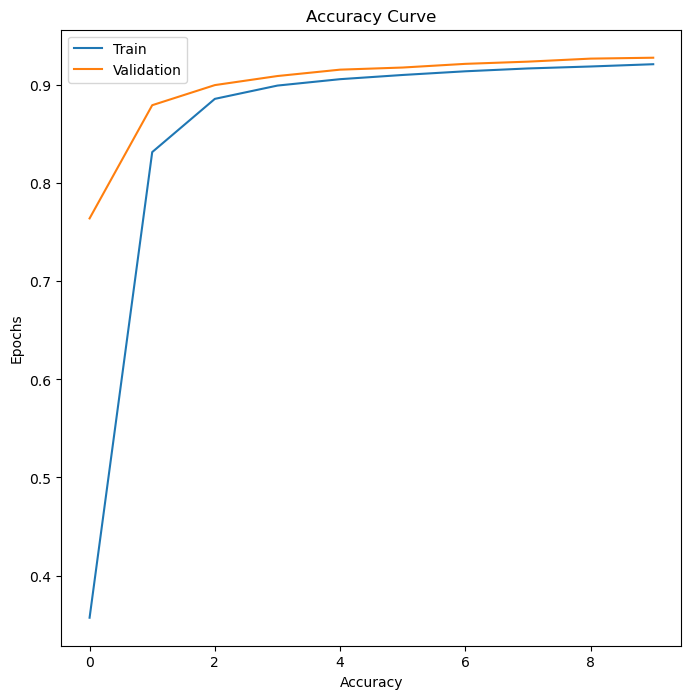

In [26]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [27]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3023	Train Accuracy 0.0781	
Epoch: [0][10/750]	Batch Time 0.000 	Batch Loss 2.3143	Train Accuracy 0.1406	
Epoch: [0][20/750]	Batch Time 0.000 	Batch Loss 2.2800	Train Accuracy 0.1250	
Epoch: [0][30/750]	Batch Time 0.000 	Batch Loss 2.3124	Train Accuracy 0.1250	
Epoch: [0][40/750]	Batch Time 0.000 	Batch Loss 2.2900	Train Accuracy 0.1406	
Epoch: [0][50/750]	Batch Time 0.000 	Batch Loss 2.3042	Train Accuracy 0.1094	
Epoch: [0][60/750]	Batch Time 0.000 	Batch Loss 2.3413	Train Accuracy 0.0781	
Epoch: [0][70/750]	Batch Time 0.000 	Batch Loss 2.3196	Train Accuracy 0.0156	
Epoch: [0][80/750]	Batch Time 0.000 	Batch Loss 2.3602	Train Accuracy 0.0781	
Epoch: [0][90/750]	Batch Time 0.000 	Batch Loss 2.3265	Train Accuracy 0.1562	
Epoch: [0][100/750]	Batch Time 0.000 	Batch Loss 2.2934	Train Accuracy 0.1875	
Epoch: [0][110/7

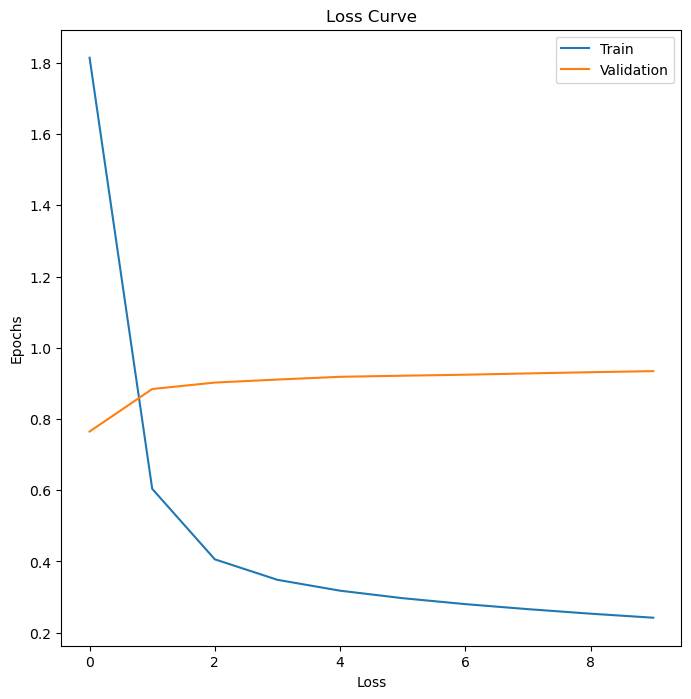

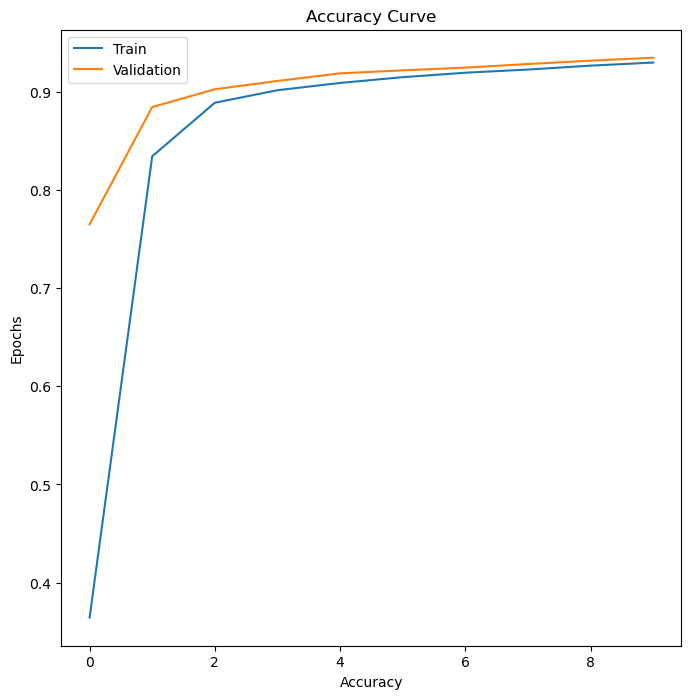

In [28]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [29]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3044	Train Accuracy 0.0469	
Epoch: [0][10/750]	Batch Time 0.000 	Batch Loss 2.3131	Train Accuracy 0.1250	
Epoch: [0][20/750]	Batch Time 0.000 	Batch Loss 2.2955	Train Accuracy 0.0938	
Epoch: [0][30/750]	Batch Time 0.000 	Batch Loss 2.3230	Train Accuracy 0.0469	
Epoch: [0][40/750]	Batch Time 0.000 	Batch Loss 2.3366	Train Accuracy 0.1094	
Epoch: [0][50/750]	Batch Time 0.000 	Batch Loss 2.3059	Train Accuracy 0.1562	
Epoch: [0][60/750]	Batch Time 0.000 	Batch Loss 2.3210	Train Accuracy 0.0625	
Epoch: [0][70/750]	Batch Time 0.000 	Batch Loss 2.3100	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.000 	Batch Loss 2.3393	Train Accuracy 0.1562	
Epoch: [0][90/750]	Batch Time 0.000 	Batch Loss 2.3576	Train Accuracy 0.0469	
Epoch: [0][100/750]	Batch Time 0.001 	Batch Loss 2.2803	Train Accuracy 0.1875	
Epoch: [0][110/7

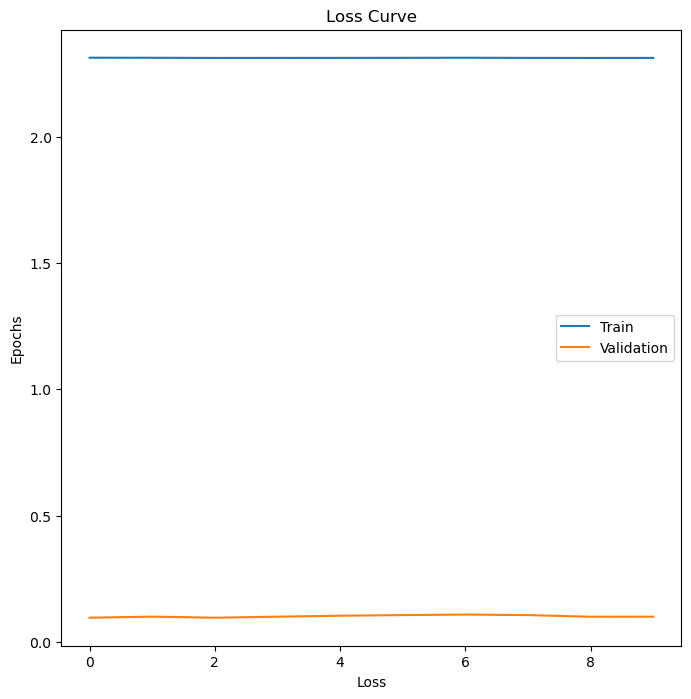

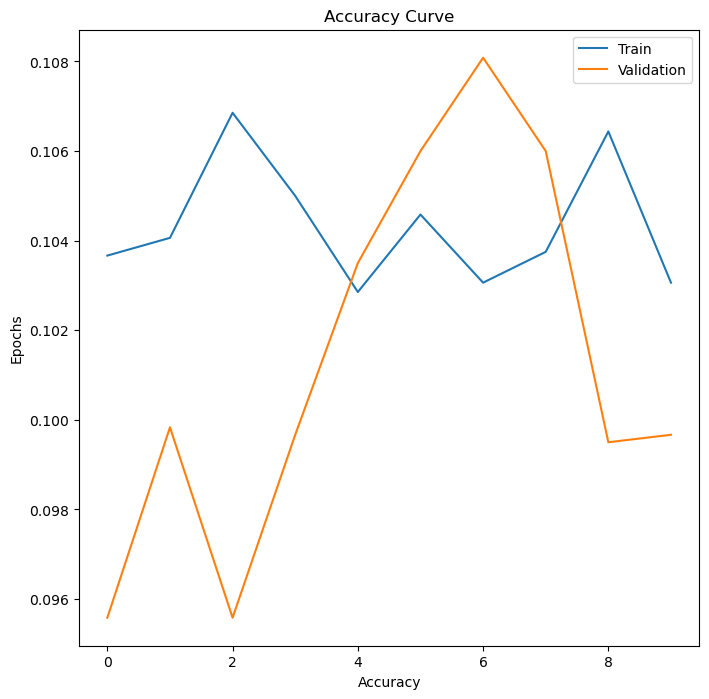

In [30]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here:

## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

In [ ]:
# Cell 28
# hyperparameter tuning
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

In [ ]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 30
#To collect submission
!sh collect_submission.sh

Describe and explain your findings here: